#Import -- Pip install

In [ ]:
pip install pyforest

In [ ]:
pip install klib

In [36]:
import pyforest
import klib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#Reading the train data and test

In [ ]:
data=pd.read_csv('Cancer-dataset.csv')

#Check the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
data.shape

(286, 10)

In [22]:
data.isnull().sum()

Class          0
Age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [9]:
data.describe(include='all')

,Class,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286.000000,286,286,286
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,201,96,150,60,213,222,NaN,152,110,218
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.048951,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.738217,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


In [10]:
data.columns

Index(['Class', 'Age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [21]:
data.head(7)

,Class,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no


#Checking each item

In [11]:
items =data['Class'].value_counts()
items

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [12]:
items =data['Age'].value_counts()
items

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: Age, dtype: int64

In [13]:
items =data['menopause'].value_counts()
items

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

In [14]:
items =data['tumor-size'].value_counts()
items

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

In [15]:
items =data['inv-nodes'].value_counts()
items

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

In [16]:
items =data['node-caps'].value_counts()
items

no     222
yes     56
?        8
Name: node-caps, dtype: int64

In [17]:
items =data['deg-malig'].value_counts()
items

2    130
3     85
1     71
Name: deg-malig, dtype: int64

In [18]:
items =data['breast'].value_counts()
items

left     152
right    134
Name: breast, dtype: int64

In [19]:
items =data['breast-quad'].value_counts()
items

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64

In [20]:
items =data['irradiat'].value_counts()
items

no     218
yes     68
Name: irradiat, dtype: int64

#Visualize / Preprocessing

GridSpec(6, 9)

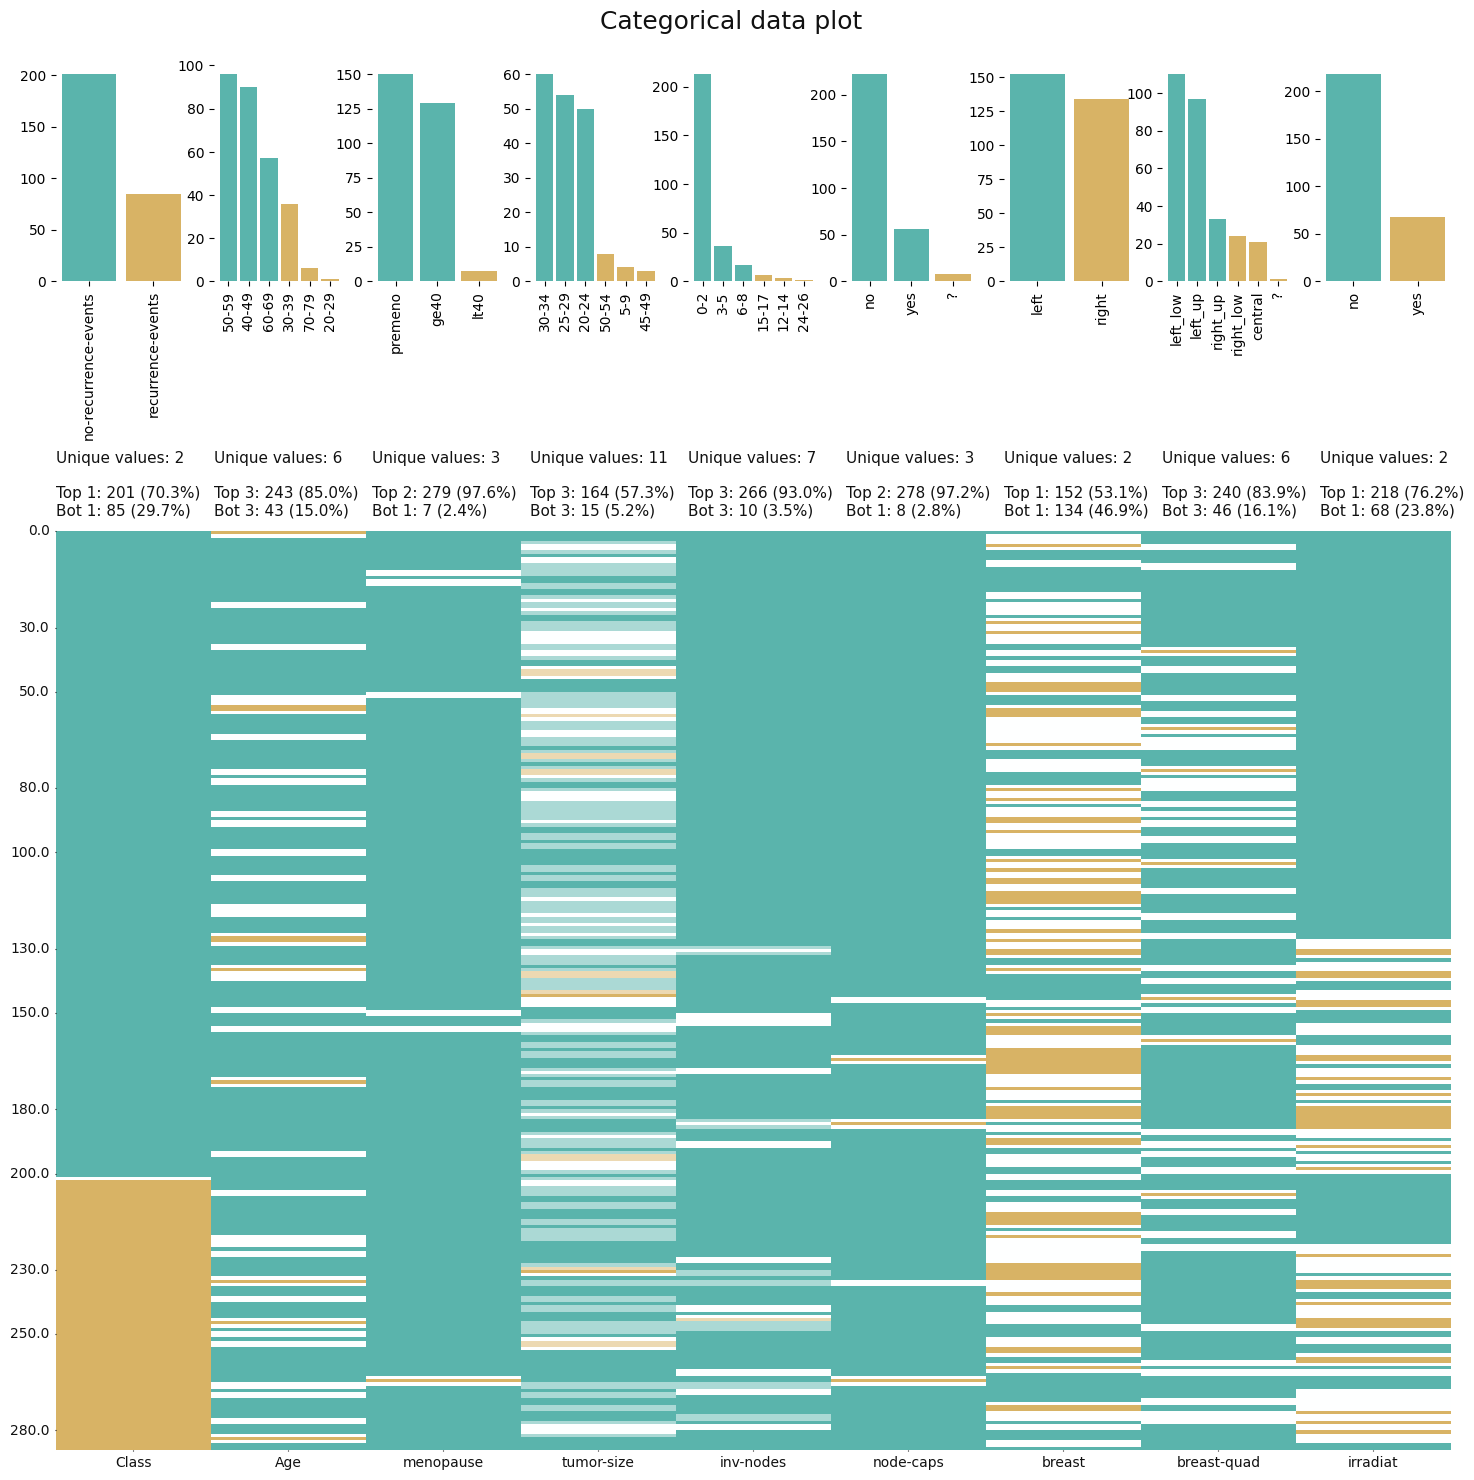

In [23]:
klib.cat_plot(data)

<IPython.core.display.Javascript object>

<Axes: xlabel='deg-malig'>

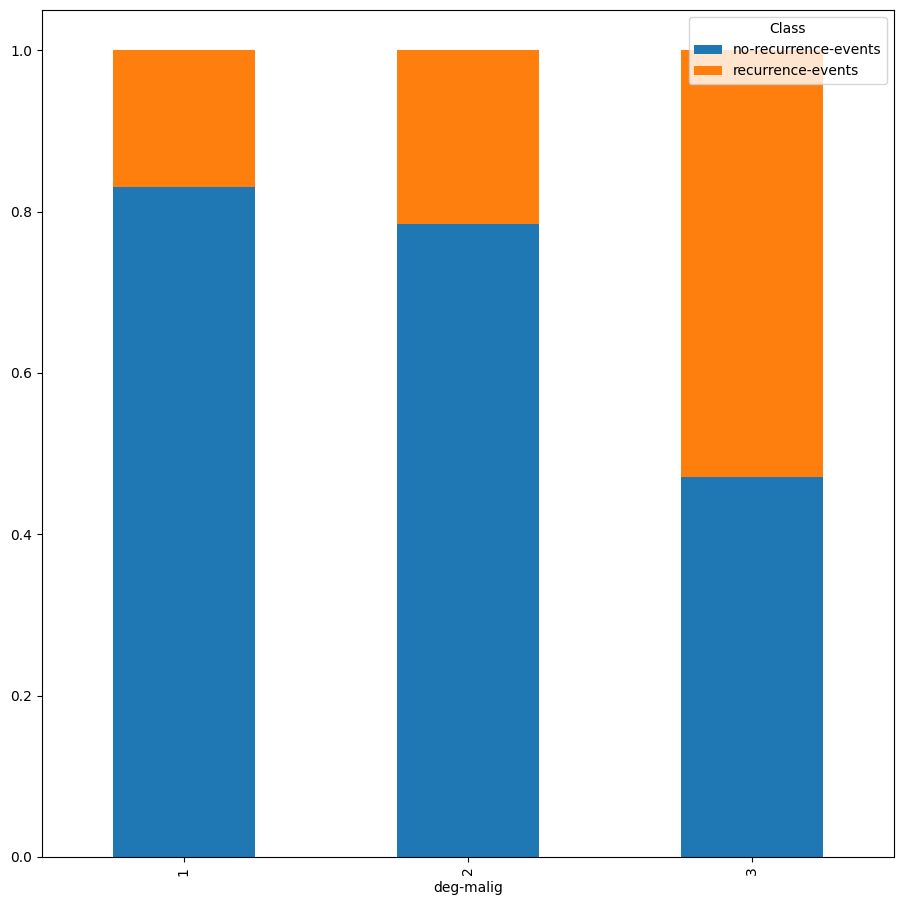

In [24]:
# deg-malig' vs Class
Item_Fat_Content = pd.crosstab(data['deg-malig'],data['Class'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<IPython.core.display.Javascript object>

<Axes: xlabel='deg-malig'>

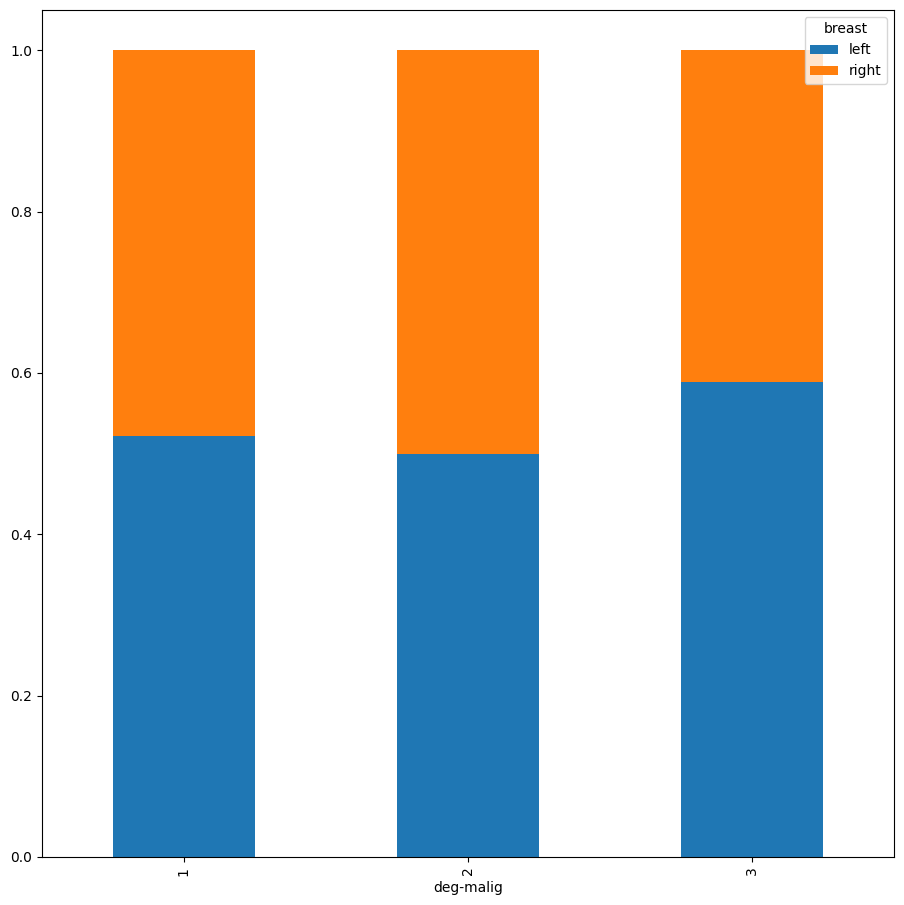

In [25]:
# deg-malig vs breast
Item_Fat_Content = pd.crosstab(data['deg-malig'],data['breast'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<IPython.core.display.Javascript object>

<Axes: xlabel='Age'>

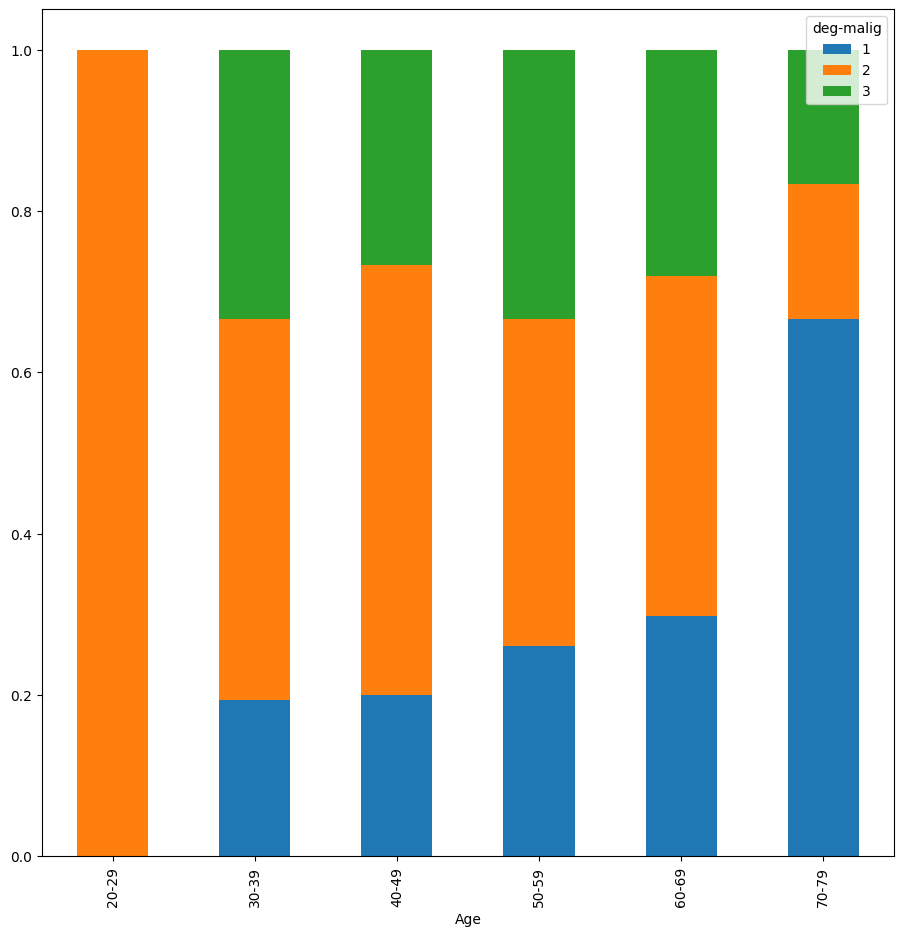

In [26]:
# Age vs deg-malig
Item_Fat_Content = pd.crosstab(data['Age'],data['deg-malig'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(11, 11))

<IPython.core.display.Javascript object>

<Axes: xlabel='deg-malig'>

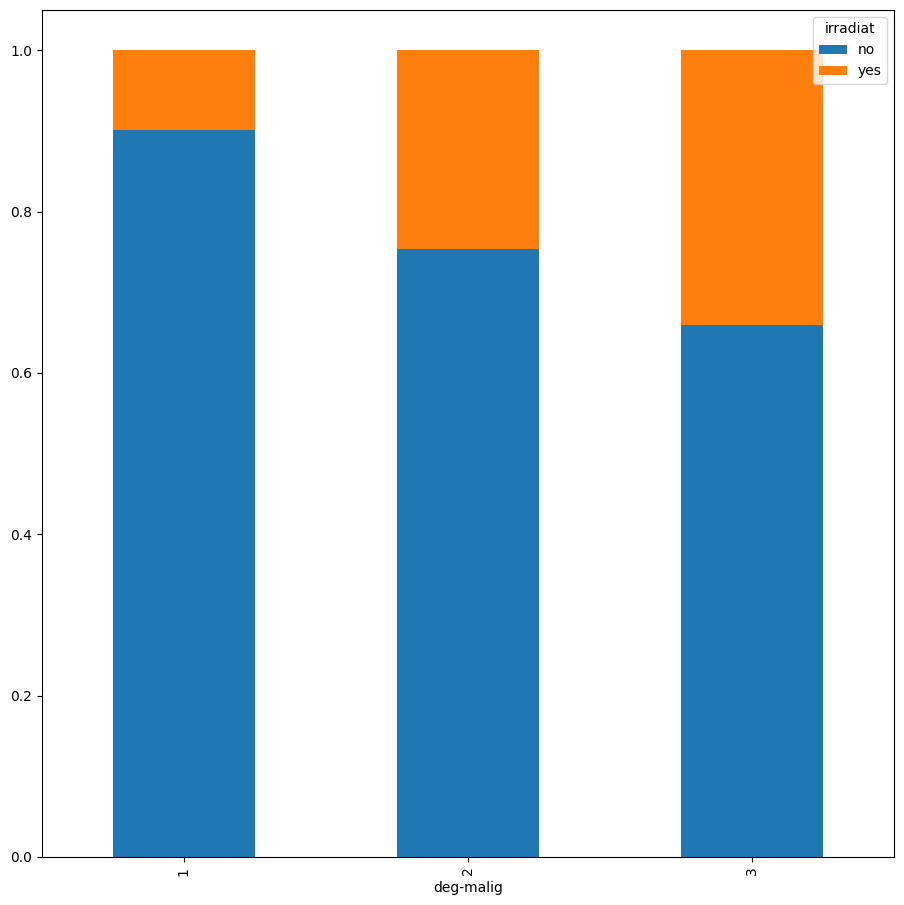

In [27]:
# deg-malig vs irradiat
Item_Fat_Content = pd.crosstab(data['deg-malig'],data['irradiat'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

In [30]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data= data.apply(le.fit_transform)

In [32]:
#Splitting data into train and tes
X=data.drop('deg-malig',axis=1)
Y=data['deg-malig']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

In [33]:
#Standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

#LogisticRegression

In [37]:
solver='liblinear'
LogReg = LogisticRegression(solver=solver)
LogReg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_pred =LogReg.predict(X_test)

In [39]:
f1 = f1_score(Y_test, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.4827586206896552
